In [145]:
from csv import DictReader
from csv import StringIO
import pandas as pd

In [146]:
reader1 = DictReader(open('podatki/pm10_2019Luka.csv', 'rt', encoding='utf-8'))
PM10=[]
for row in reader1:
    datum = row["datum"]
    LJ = row["LJ_Bežigrad"]
    PM10.append([datum, LJ])  

In [147]:
df = pd.read_csv("podatki/lj_bezigrad_vseLuka.csv",delimiter=";")
df['povpdnevnaT'] = df['povpdnevnaT'].astype(str)
df['oblacnost'] = df['oblacnost'].astype(str)
df['povprelvla'] = df['povprelvla'].astype(str)
df['kolicinapadavin'] = df['kolicinapadavin'].astype(str)
df['padavine'] = df['padavine'].astype(str)

df1 = pd.read_csv("podatki/pm25_2019Luka.csv",delimiter=";")
df1['LjubljanaBezigrad'] = df1['LjubljanaBezigrad'].astype(str)

V celicah zgoraj si pripravim podatke iz datotek v obliko za obdelavo. Izberem atribute, ki me zanimajo (Vrednost PM10 za Bežigrad, povprečna dnevna temperatura, oblačnost, povprečna relativna vlaga, količina padavin, padavine)

In [148]:
x = 0
dan = 2
dnevi = []
for i in PM10:
    if(dan < 6):
        stri = i[0] + "," + i[1] +","+ df1.LjubljanaBezigrad[x] +  "," + df.povpdnevnaT[x] + "," + df.oblacnost[x] + "," + df.povprelvla[x] + "," + df.kolicinapadavin[x] + "," + df.padavine[x]  
        dnevi.append(stri)
    elif(dan >= 6):
        if(dan == 7):
            dan = 0
    if(dan == 0):
        dan = dan + 1
    else:
        dan = dan + 1
    x = x + 1

Ustvarim csv strukturo, za nadaljno uporabo in delitev. Skupaj sestavim meritve PM10 v Bežigradu in ostale atribute iz druge datoteke glede na dan datum. Prav tako odvzamem vse meritve vikendov (sobota, nedelja), saj so te običajno drastično manjše in bi lahko vplivale na izračune.

In [149]:
import statistics as st

povp10ne = []
povp25ne = []
povp10da = []
povp25da = []
for i in dnevi:
    spl = i.split(",")
    if(spl[7] == "ne"):
        if((spl[1] != "-") and (spl[2] != "-")):
            povp10ne.append(float(spl[1]))
            povp25ne.append(float(spl[2]))
    if(spl[7] == "da"):
        if((spl[1] != "-") and (spl[2] != "-")):
            povp10da.append(float(spl[1]))
            povp25da.append(float(spl[2]))

print("Vrednosti povprečij in odklonov za merilno postajo Bežigrad:")
print("Ko ni padavin; Povprečje PM10 delcev: " + str(round(st.mean(povp10ne), 5)) + ", Povprečje PM2.5 delcev: " + str(round(st.mean(povp25ne), 5)))
print("Ko ni padavin; St. odklon PM10 delcev: " + str(round(st.stdev(povp10ne), 5)) + ", St. odklon PM2.5 delcev: " + str(round(st.stdev(povp25ne), 5)))
print("Ob padavinah; Povprečje PM10 delcev: " + str(round(st.mean(povp10da), 5)) + ", Povprečje PM2.5 delcev: " + str(round(st.mean(povp25da), 5)))
print("Ob padavinah; St. odklon PM10 delcev: " + str(round(st.stdev(povp10da), 5)) + ", St. odklon PM2.5 delcev: " + str(round(st.stdev(povp25da), 5)))

Vrednosti povprečij in odklonov za merilno postajo Bežigrad:
Ko ni padavin; Povprečje PM10 delcev: 24.5566, Povprečje PM2.5 delcev: 17.83019
Ko ni padavin; St. odklon PM10 delcev: 12.70327, St. odklon PM2.5 delcev: 10.73798
Ob padavinah; Povprečje PM10 delcev: 16.32381, Povprečje PM2.5 delcev: 11.73333
Ob padavinah; St. odklon PM10 delcev: 9.07076, St. odklon PM2.5 delcev: 7.31998


Zgoraj razdelim vsak vnos v csv strukturi glede na padavine (da, ne) in ločeno shranim vrednosti. Dni s padavinami je v Bežigradu približno enako kot v celoti sončnih. Iz podatkov je razvidno, da se vrednosti PM10 in PM2.5 drastično razlikujejo glede na padavine.

In [150]:
#datum,LJ_Bežigrad,LJ_ BF,LJ_GR,Maribor,Zagorje,Hrastnik,Trbovlje,Novo_mesto,Kranj,M.Sobota,Iskrba,Žerjav,Celje,N.Gorica,Velenje,Koper,NG_Grčna,CE_Mar.,MS_Cank.
import numpy
reader3 = DictReader(open('podatki/pm10_2019Luka.csv', 'rt', encoding='utf-8'))
PM10=[]
LJB,LJBF,LJGR,MB,ZG,HR,TR,NM,KR,MS,IS,ZR,CE,NG,VE,KP,NGG,CEM,MSC = ([] for i in range(19))
for row in reader3:
    if(row["LJ_Bežigrad"] != '-'): LJB.append(float(row["LJ_Bežigrad"]))
    if(row["LJ_ BF"] != '-'): LJBF.append(float(row["LJ_ BF"]))
    if(row["LJ_GR"] != '-'): LJGR.append(float(row["LJ_GR"]))
    if(row["Maribor"] != '-'): MB.append(float(row["Maribor"]))
    if(row["Zagorje"] != '-'): ZG.append(float(row["Zagorje"]))
    if(row["Hrastnik"] != '-'): HR.append(float(row["Hrastnik"]))
    if(row["Trbovlje"] != '-'): TR.append(float(row["Trbovlje"]))
    if(row["Novo_mesto"] != '-'): NM.append(float(row["Novo_mesto"]))
    if(row["Kranj"] != '-'): KR.append(float(row["Kranj"]))
    if(row["M.Sobota"] != '-'): MS.append(float(row["M.Sobota"]))
    if(row["Iskrba"] != '-'): IS.append(float(row["Iskrba"]))
    if(row["Žerjav"] != '-'): ZR.append(float(row["Žerjav"]))
    if(row["Celje"] != '-'): CE.append(float(row["Celje"]))
    if(row["N.Gorica"] != '-'): NG.append(float(row["N.Gorica"]))
    if(row["Velenje"] != '-'): VE.append(float(row["Velenje"]))
    if(row["Koper"] != '-'): KP.append(float(row["Koper"]))
    if(row["NG_Grčna"] != '-'): NGG.append(float(row["NG_Grčna"]))
    if(row["CE_Mar."] != '-'): CEM.append(float(row["CE_Mar."]))
    if(row["MS_Cank."] != '-'): MSC.append(float(row["MS_Cank."]))


In [151]:
odkloni = []
for i in [LJB,LJBF,LJGR,MB,ZG,HR,TR,NM,KR,MS,IS,ZR,CE,NG,VE,KP,NGG,CEM,MSC]:
    odkloni.append(round(st.stdev(i), 4))

Zgoraj preberem datoteko z vnosi PM10 vrednosti za 19 merilnih postaj glede na dani datum. Imel sem veliko problemov z računanjem standardnega odklona, saj veliko podatkov manjka (-). Teh manjkajočih podatkov sem se znebil precej grdo, kot je razvidno zgoraj. Za vsako postajo sem ustvaril polje in v njo vnesel vrednosti iz te postaje. Nato sem šel čez vsa polja postaj in za vsako posebej izračunal standardni odklon.

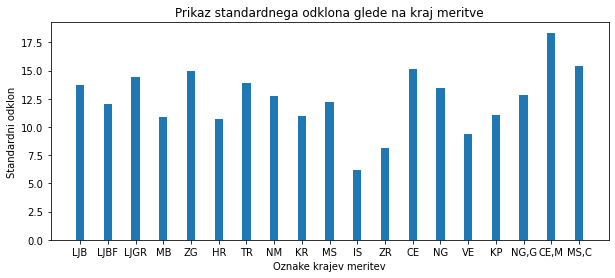

In [152]:

import matplotlib.pyplot as plt


y = ("LJB","LJBF","LJGR","MB","ZG","HR","TR","NM","KR","MS","IS","ZR","CE","NG","VE","KP","NG,G","CE,M","MS,C")
plt.figure(figsize=(10, 4))
plt.bar(y,odkloni,align='center', width = 0.3) # A bar chart
plt.title("Prikaz standardnega odklona glede na kraj meritve")
plt.xlabel('Oznake krajev meritev')
plt.ylabel('Standardni odklon')

plt.show()

Zgoraj je izrisan graf, kjer je x os oznaka kraja meritve, y os pa predstavlja vrednost standardnega odklona. Iz podatkov je razvidno, da so v Celju v povprečju najmanj enotno izmerjeni podatki PM10 delcev.